In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# csv 파일 읽어오기
titanic_df = pd.read_csv("./data/titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- PassengerId : 승객식별자 (사용 X)
- Survived : 생존여부 (1 : 생존, 0 : 사망) -> 타겟변수
- Pclass : 티켓등급 (1 : 1등석, 2 : 2등석, 3 : 3등석)
- Name : 이름 (사용 X)
- Sex : 성별 (male female)
- Age : 나이 (결측치 있음)
- SibSp : 동반가족수(형제, 배우자)
- Parch : 부모자식수(부모, 자식)
- Ticket : 티켓번호 (사용 X)
- Fare : 요금
- Cabin : 선실 (결측치 있음)
- Embarked : 탑승지 (C : 캐나다, Q : 퀸즈, S : 스페인)

In [4]:
# 결측치 확인
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# 컬럼내 null값 처리 (fillna 함수 사용): Age는 평균, Cabin과 Embarked는 'N'으로 대체
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

# 결측치 확인
titanic_df.isnull().sum()


/var/folders/51/k_yn4qxs0_nfrm1hk39_0m2r0000gn/T/ipykernel_36846/3166942527.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
/var/folders/51/k_yn4qxs0_nfrm1hk39_0m2r0000gn/T/ipykernel_36846/3166942527.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
# 범주형 변수들 고유값 확인
print("성별의 고유값 :", titanic_df['Sex'].value_counts())
print("객실번호의 고유값 :", titanic_df['Cabin'].value_counts())
print("탑승위치의 고유값 :", titanic_df['Embarked'].value_counts())

성별의 고유값 : Sex
male      577
female    314
Name: count, dtype: int64
객실번호의 고유값 : Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64
탑승위치의 고유값 : Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [7]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] # 객실번호에서 첫글자만 추출 (객실 등급/구역정보)

In [8]:
# 성별 X 생존자
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

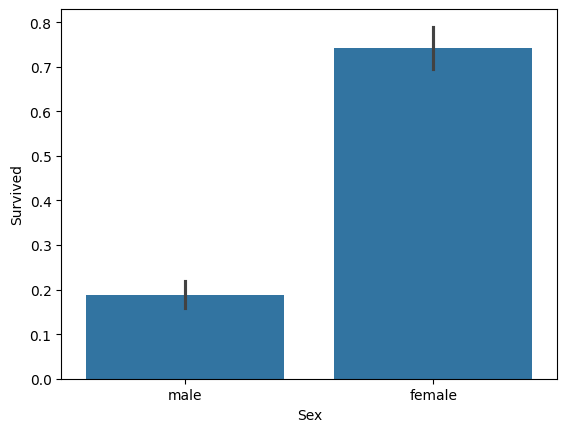

In [9]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.show()

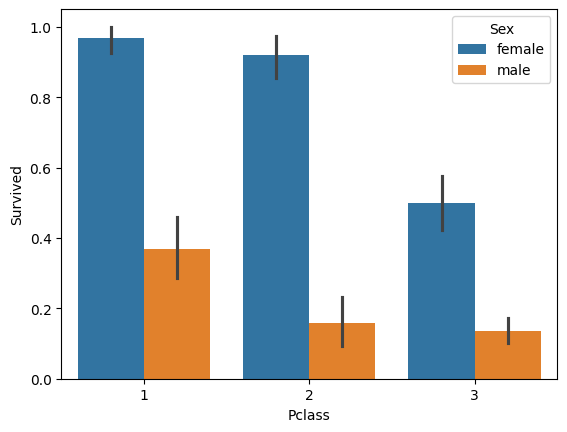

In [10]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df)
plt.show()

#### 3등급 객실은 1등급 2등급 객실에 비해 생존률이 낮았다.

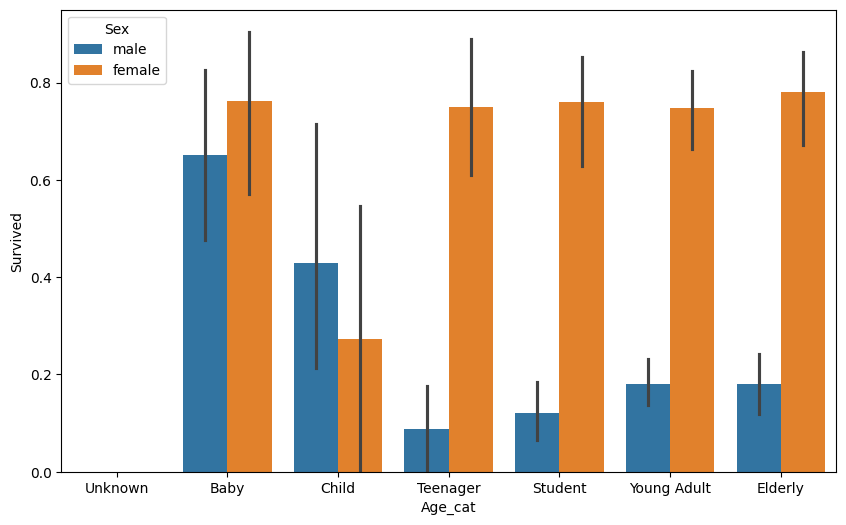

In [11]:
# 입력되는 age에 따라 구분값을 반환하는 함수. DataFrame의 apply() lambda로 사용
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    else : cat = 'Elderly'

    return cat

plt.figure(figsize=(10, 6))  # 그래프 크기 설정

# 시각화 순서용 리스트
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Elderly']
# lambda식을 사용해 get_category() 함수 출력값을 새로운 파생변수 'Age_cat' 값으로 사용한다.
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))

sns.barplot(x="Age_cat", y="Survived", hue="Sex", data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

#### 남성의 경우 어린아이거나 상대적으로 노인이 살아남은 경향
#### 여성의 경우 Child를 제외한 전 구간에서 높은 생존률

In [12]:
# 인코딩
from sklearn.preprocessing import LabelEncoder

# 인코딩 함수
def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()

        # 카테고리값이 유형에 따라 0 ~ (카테고리 유형수 -1)까지의 숫자 값으로 변환
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [18]:
# 아래서 사용할 함수 정의

# null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)

    return df

# 붎필요한 feature 제거 함수
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행 함수
def label_encode(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']

    for feature in features:
        le = LabelEncoder()

        # 카테고리값이 유형에 따라 0 ~ (카테고리 유형수 -1)까지의 숫자 값으로 변환
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])

    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = label_encode(df)

    return df

### 전처리 함수 생성

-   학습 데이터와 테스트 데이터를 분리한 뒤 모델 학습

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

titanic_df = pd.read_csv("./data/titanic_train.csv")
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

/var/folders/51/k_yn4qxs0_nfrm1hk39_0m2r0000gn/T/ipykernel_36846/2245348217.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/var/folders/51/k_yn4qxs0_nfrm1hk39_0m2r0000gn/T/ipykernel_36846/2245348217.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [20]:
# 학습용 데이터셋과 테스트 데이터셋을 나눠준다
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)


In [21]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

712 179 712 179


In [24]:
# 모델 선정 및 학습
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, RandomForest, 로지스틱 회귀 사용
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')  # liblinear 방색으로 분류

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
df_pred = dt_clf.predict(X_test)
print("DecisionTreeClassifier의 정확도 :", accuracy_score(y_test, df_pred))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("RandomForestClassifier의 정확도 :", accuracy_score(y_test, rf_pred))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression의 정확도 :", accuracy_score(y_test, lr_pred))

DecisionTreeClassifier의 정확도 : 0.7877094972067039
RandomForestClassifier의 정확도 : 0.8547486033519553
LogisticRegression의 정확도 : 0.8659217877094972


In [25]:
# K-fold 교차검증
import numpy as np
from sklearn.model_selection import KFold

# kfold 함수
def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []

    # k-fold 교차검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print(f'교차 검증 {iter_count}의 정확도: {accuracy}')

    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print(f'평균 정확도: {mean_score:.4f}')

exec_kfold(dt_clf)

교차 검증 0의 정확도: 0.7541899441340782
교차 검증 1의 정확도: 0.7808988764044944
교차 검증 2의 정확도: 0.7865168539325843
교차 검증 3의 정확도: 0.7696629213483146
교차 검증 4의 정확도: 0.8202247191011236
평균 정확도: 0.7823


In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print(f'교차 검증 {iter_count}의 정확도: {accuracy:.4f}')

print(f'평균 정확도: {np.mean(scores):.4f}')

교차 검증 0의 정확도: 0.7430
교차 검증 1의 정확도: 0.7753
교차 검증 2의 정확도: 0.7921
교차 검증 3의 정확도: 0.7865
교차 검증 4의 정확도: 0.8427
평균 정확도: 0.7879


In [29]:
# GridSearchCV로 최적의 하이퍼파라미터를 찾는다.
from sklearn.model_selection import GridSearchCV

parameters = {
    "max_depth": [2, 3, 5, 10],         # 트리 최대 깊이
    "min_samples_split": [2, 3, 5],     # 노드 분할시 최소 샘플 수
    "min_samples_leaf": [1, 5, 8]       # 리프 노드에 반드시 남아야 하는 최소 샘플 수
}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print("GridSearchCV의 최적의 하이퍼 파라미터", grid_dclf.best_params_)
print("GridSearchCV의 최고의 정확도", grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_    # 최적의 모델 저장

# 최적의 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
acuracy = accuracy_score(y_test, dpredictions)
print(f"DecisionTreeClassifier의 정확도 : accuracy:.4f")


GridSearchCV의 최적의 하이퍼 파라미터 {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV의 최고의 정확도 0.7991825076332119
DecisionTreeClassifier의 정확도 : accuracy:.4f
